In [45]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
!pip install klib

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
plt.rc('font',family='Malgun Gothic')
from matplotlib import font_manager, rc
# EDA
import klib

# Data Split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
seed = 42
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn import model_selection

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

# Modeling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm, tqdm_notebook
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import warnings
import tensorflow as tf
import kerastuner as kt
import optuna
from tensorflow import keras

In [46]:
train = pd.read_csv('data/data_01_01.csv')
test = pd.read_csv('data/data_02_02.csv')
label = pd.read_csv('data/data_03_03.csv')

In [47]:
q = test.cust.unique()

In [48]:
train['y_train'] = train.cust.apply(lambda x:1 if x in q else 0)

In [49]:
q = label.cust.unique()

In [50]:
test['y_test'] = test.cust.apply(lambda x:1 if x in q else 0)

In [51]:
set(train.columns)- set(test.columns)

{'y_train'}

In [52]:
data_c = pd.concat([train, test]);data_c

,cust,총구매액,구매건수,평균구매액,최대구매액,최소구매액,주말방문비율,주중방문비율,새벽-구매비율,아침-구매비율,...,13clac_hlv_nm,14clac_hlv_nm,15clac_hlv_nm,16clac_hlv_nm,17clac_hlv_nm,18clac_hlv_nm,19clac_hlv_nm,cluster,y_train,y_test
0,M000034966,152200.0,6,25367.0,62100.0,100.0,1.000000,0.000000,0.0,0.0,...,0.090960,0.130671,-0.098886,0.290042,0.133703,-0.198718,-0.300343,0,0.0,NaN
1,M000136117,10660370.0,27,394829.0,2230000.0,2980.0,0.074074,0.925926,0.0,0.0,...,0.192461,-0.024225,-0.215239,0.236278,0.103980,-0.153553,-0.276714,1,1.0,NaN
2,M000261625,242000.0,3,80667.0,180000.0,27000.0,1.000000,0.000000,0.0,0.0,...,-0.375893,0.078044,-0.442300,0.301561,0.023505,-0.029855,-0.374653,0,1.0,NaN
3,M000419293,565800.0,9,62867.0,260100.0,100.0,0.000000,1.000000,0.0,0.0,...,-0.010447,-0.126298,-0.202469,0.404195,0.300666,0.362218,-0.442397,0,1.0,NaN
4,M000494848,1264510.0,62,20395.0,408000.0,100.0,0.532258,0.467742,0.0,0.0,...,0.140288,-0.009823,-0.258209,0.140659,-0.017895,-0.159755,-0.304484,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17945,M999599111,1158000.0,1,1158000.0,1158000.0,1158000.0,0.000000,1.000000,0.0,0.0,...,-1.272072,0.359664,0.104475,-0.436959,-0.409997,0.191860,0.963529,4,NaN,0.0
17946,M999673157,119300.0,8,14912.0,45000.0,2000.0,0.500000,0.500000,0.0,0.0,...,-0.386964,-0.194843,0.305543,-0.278757,-0.396987,-0.070210,0.276226,0,NaN,1.0
17947,M999770689,259020.0,67,3866.0,19900.0,160.0,0.313433,0.686567,0.0,0.0,...,-0.103465,-0.234336,0.234404,-0.493439,-0.182592,-0.205156,0.248215,0,NaN,1.0
17948,M999849895,80950.0,4,20238.0,45000.0,2450.0,0.000000,1.000000,0.0,0.0,...,-0.197163,-0.203746,0.368279,-0.672001,-0.566264,0.596646,-0.076124,0,NaN,1.0


In [53]:
주구매 = data_c.filter(regex = '주구매상품대분류').columns.to_list()

In [54]:
data_c.drop(주구매,axis = 1,inplace  = True)

In [55]:
train = data_c.iloc[:len(train)]
test = data_c.iloc[len(train):]

In [56]:
train.most_cop = train.most_cop.fillna('X')
test.most_cop = test.most_cop.fillna('X')

In [57]:
train.most_chnl = train.most_chnl.fillna(0)
test.most_chnl = test.most_chnl.fillna(0)

train.point_count = train.point_count.fillna(train.point_count.mean())
test.point_count = test.point_count.fillna(test.point_count.mean())

train.point_sum = train.point_count.fillna(train.point_sum.mean())
test.point_sum = test.point_count.fillna(test.point_sum.mean())

In [58]:
train = train.fillna(0)
test = test.fillna(0)

In [59]:
y_train = train.y_train
del(train['y_train'])
y_test = test.y_test
del(test['y_test'])

In [60]:
train_id=train.cust
del(train['cust'])
test_id=test.cust
del(test['cust'])

In [61]:
del train["y_test"]
del test["y_train"]

In [62]:
train=pd.get_dummies(data = train, columns = ['most_cop'], prefix = 'most_cop')
test=pd.get_dummies(data = test, columns = ['most_cop'], prefix = 'most_cop')

In [63]:
X_train = train
X_test = test

del train
del test

In [64]:
# standard Scaler 정규화 진행

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# 군집화 진행   # 5로 했을 때 성능이 좋아짐.  # 5, 10만 실험해봄,

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X_train)

KMeans(n_clusters=5)

In [66]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [67]:
# 군집화 결과 피쳐 추가

X_train["group"]=model.predict(X_train)
X_test["group"]=model.predict(X_test)

- model 함수화

In [24]:
# 시드 고정

def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(1)
    random.seed(2)
    tf.compat.v1.set_random_seed(3)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


In [25]:
def lgbm_train(dic, lst, result):

    pbounds = {
        'n_estimators':(50,800),
        'learning_rate':(0.001,1.5),
        'max_depth':(2, 32),
        'num_leaves':(2, 64),
        'subsample':(0.5, 0.95),
        'colsample_bytree':(0.5, 0.95),
        'max_bin':(10, 500),
        'reg_lambda':(0.001, 50),
        'reg_alpha':(0.001, 50)
    }
    def lgbm_opt(n_estimators, learning_rate, max_depth, num_leaves,
                 subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
        params = {
            "n_estimators":int(round(n_estimators)), 
            "learning_rate":learning_rate,
            'max_depth':int(round(max_depth)),
            'num_leaves':int(round(num_leaves)),
            'subsample':max(min(subsample, 1), 0),
            'colsample_bytree':max(min(colsample_bytree, 1), 0),
            'reg_lambda': reg_lambda,
            'reg_alpha': reg_alpha,
            'max_bin':int(max_bin)
        }


        lgbm = LGBMClassifier(objective= 'regression', metric= 'mse', random_state=0, **params, n_jobs=-1)
        lgbm.fit(X_train, y_train, early_stopping_rounds=30, eval_metric= ['logloss','accuracy'], eval_set=[(valid_X, valid_y)], verbose=False)
        score = cross_val_score(lgbm, X_train, y_train, scoring='neg_mean_absolute_error', cv=4, n_jobs=-1)

        return np.mean(score)

    BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=0)
    BO_lgbm.maximize(init_points=10, n_iter=10)

    max_params_lgbm = BO_lgbm.max['params']
    max_params_lgbm
    
    
    max_params_lgbm['n_estimators'] = int(max_params_lgbm['n_estimators'])
    max_params_lgbm['max_depth'] = int(max_params_lgbm['max_depth'])
    max_params_lgbm['max_bin'] = int(max_params_lgbm['max_bin'])
    max_params_lgbm['num_leaves'] = int(max_params_lgbm['num_leaves'])
    
    
    lgbm_clf = LGBMClassifier(objective= 'regression', metric= 'mse', random_state = 0, **max_params_lgbm)
    
    lgbm_clf.fit(X_train,y_train)
    y_pred = lgbm_clf.predict(X_test)
    y_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]


    a=log_loss(y_test,y_pred_proba)
    b=roc_auc_score(y_test,y_pred_proba)
    c=accuracy_score(y_test,y_pred)
    
    result.append(y_pred_proba)
    dic["lgbm"]=lgbm_clf
    print("log_loss: ",a,"roc_auc : ", b, "accuracy : ",c)
    lst.append({"log_loss":a,"roc_auc":b,"accuracy":c})

In [26]:
def dnn_train(dic, lst, result):
    
    def model_fn(hp):
        inputs = keras.Input(shape=(train_X.shape[1],))
        x = inputs
        for i in range(hp.Int('num_layers', 2, 3)):
            x = keras.layers.Dense(hp.Int('unit_'+str(i), 16, 64, step=16), activation='relu')(x)
            x = keras.layers.Dropout(hp.Float('dropout_'+str(i), 0, 0.5, step=0.25, default=0.5))(x)
        outputs = keras.layers.Dense(1, activation='sigmoid')(x)
        model = keras.Model(inputs, outputs)
        model.compile(loss='binary_crossentropy', 
                      optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                      metrics=[keras.metrics.AUC()])
        return model 
    
    
    tuner = kt.Hyperband(model_fn,
                         objective=kt.Objective('val_loss', direction="min"), 
                         max_epochs=5,
                         hyperband_iterations=2,
                         overwrite=True,
                         directory='dnn_tuning')

    tuner.search(train_X, train_y, validation_data=(valid_X, valid_y), 
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

    model = tuner.get_best_models(1)[0]
    model.summary()
    
    y_pred = model.predict(X_test)
    #y_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
    
    #a=log_loss(y_test,y_pred)
    b=roc_auc_score(y_test,y_pred)
    #c=accuracy_score(y_test,y_pred)
    
    result.append(y_pred[:,0])
    dic["dnn"]=model
    print("log_loss: ","roc_auc : ", b, "accuracy : ")
    lst.append({"roc_auc":b})

In [27]:
def lr_train(dic, lst, result):
    
    def lr_opt(trial):
        lr_penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])
        lr_c = trial.suggest_float("C", 0.01, 10, step = 0.05)

        lr_clf = LogisticRegression(
                penalty = lr_penalty,
                C = lr_c,
                n_jobs = -1,
                random_state = 44
        )

        score = np.mean(cross_val_score(lr_clf, X_train, y_train, scoring = "neg_mean_absolute_error", n_jobs = -1))
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(lr_opt, n_trials=20)
    
    lr_clf=LogisticRegression(**study.best_trial.params)
    lr_clf.fit(X_train,y_train)
    
    y_pred = lr_clf.predict(X_test)
    y_pred_proba = lr_clf.predict_proba(X_test)[:,1]


    a=log_loss(y_test,y_pred_proba)
    b=roc_auc_score(y_test,y_pred_proba)
    c=accuracy_score(y_test,y_pred)
    
    result.append(y_pred_proba)
    dic["lr"]=lr_clf
    print("log_loss: ",a,"roc_auc : ", b, "accuracy : ",c)
    lst.append({"log_loss":a,"roc_auc":b,"accuracy":c})

In [28]:
def ada_train(dic, lst, result):
    pbounds = { 'learning_rate': (0.01, 1.5),
            'n_estimators': (50, 100)}

    def ada_opt(learning_rate, n_estimators):

        params = {
            'learning_rate': learning_rate,
            'n_estimators' : int(round(n_estimators))
        }

        ada = AdaBoostClassifier(**params,random_state=0,)
        score = cross_val_score(ada, X_train, y_train, scoring='neg_mean_absolute_error', cv=4, n_jobs=-1)
        return np.mean(score)

    BO_ada = BayesianOptimization(f = ada_opt, pbounds = pbounds, random_state=0)
    BO_ada.maximize(init_points=10, n_iter=10)

    max_params_ada = BO_ada.max['params']
    max_params_ada
    
    max_params_ada['n_estimators'] = int(max_params_ada['n_estimators'])
    ada_clf = AdaBoostClassifier(random_state = 0, **max_params_ada)
    ada_clf.fit(X_train,y_train)

    y_pred = ada_clf.predict(X_test)
    y_pred_proba = ada_clf.predict_proba(X_test)[:,1]


    a=log_loss(y_test,y_pred_proba)
    b=roc_auc_score(y_test,y_pred_proba)
    c=accuracy_score(y_test,y_pred)
    
    result.append(y_pred_proba)
    dic["ada"]=ada_clf
    print("log_loss: ",a,"roc_auc : ", b, "accuracy : ",c)
    lst.append({"log_loss":a,"roc_auc":b,"accuracy":c})


In [29]:
def cat_train(dic, lst, result):
    c_model = CatBoostClassifier(random_state = 44)
    c_model.fit(X_train,y_train)
    
    y_pred = c_model.predict(X_test)
    y_pred_proba = c_model.predict_proba(X_test)[:,1]


    a=log_loss(y_test,y_pred_proba)
    b=roc_auc_score(y_test,y_pred_proba)
    c=accuracy_score(y_test,y_pred)
    
    
    result.append(y_pred_proba)
    dic["cat"]=c_model
    print("log_loss: ",a,"roc_auc : ", b, "accuracy : ",c)
    lst.append({"log_loss":a,"roc_auc":b,"accuracy":c})

In [30]:
def rf_train(dic, lst, result):
    pbounds = { 'n_estimators': (50,250),
            'max_depth': (5,15), 
            'max_features': (0.8,0.95),
            'min_samples_leaf': (1, 5)}

    def rf_opt(n_estimators, max_depth, max_features, min_samples_leaf):
        params = {'n_estimators' : int(round(n_estimators)),
            'max_depth' : int(round(max_depth)),
            'min_samples_leaf' : int(round(min_samples_leaf))}

        rf = RandomForestClassifier(**params, n_jobs = -1, random_state = 0)
        score = cross_val_score(rf, X_train, y_train, scoring = 'roc_auc', cv = 4, n_jobs = -1)
        return np.mean(score)


    BO_rf = BayesianOptimization(f = rf_opt, pbounds = pbounds, random_state=0)
    BO_rf.maximize(init_points=5, n_iter=5)

    max_params_rf = BO_rf.max['params']
    
    max_params_rf['n_estimators'] = int(max_params_rf['n_estimators'])
    max_params_rf['max_depth'] = int(max_params_rf['max_depth'])
    max_params_rf['min_samples_leaf'] = int(max_params_rf['min_samples_leaf'])
    rf_clf = RandomForestClassifier(random_state = 0, **max_params_rf)
    rf_clf.fit(X_train,y_train)
    
    y_pred = rf_clf.predict(X_test)
    y_pred_proba = rf_clf.predict_proba(X_test)[:,1]


    a=log_loss(y_test,y_pred_proba)
    b=roc_auc_score(y_test,y_pred_proba)
    c=accuracy_score(y_test,y_pred)
    
    
    result.append(y_pred_proba)
    dic["rf"]=rf_clf
    print("log_loss: ",a,"roc_auc : ", b, "accuracy : ",c)
    lst.append({"log_loss":a,"roc_auc":b,"accuracy":c})

In [31]:
model_dict={}; model_dict1={} ; model_dict2={}   # 학습한 모델 저장
score_lst=[]; score_lst1=[]; score_lst2=[]  # validation 점수 저장   딕셔너리 형태 key 값 : log_loss, roc_auc, accuracy
result_lst=[]; result_lst1=[]; result_lst2=[]


lst_e=[[model_dict, score_lst, result_lst], [model_dict1, score_lst1, result_lst1], [model_dict2, score_lst2, result_lst2]]

t = X_train
k = X_test
a_1=random.sample(list(t.columns),int(len(list(t.columns))//2))
b_1=random.sample(list(t.columns),int(len(list(t.columns))//2))
c_1=random.sample(list(t.columns),int(len(list(t.columns))//2))

column_lst=[a_1, b_1, c_1]

# 주의 오래걸림! 모든 모델 훈련 18(3*6)개의 모델 튜닝 및 훈련
def ensemble():
    global train_X, valid_X, train_y, valid_y, X_train, y_train, X_test
    for z,i in tqdm(enumerate(lst_e)):
        X_train=t[column_lst[z]]
        X_test=k[column_lst[z]]
        train_X, valid_X, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3, shuffle=False, random_state=34)

        def train():
            lr_train(i[0], i[1], i[2]); print("LR FINISH")
            lgbm_train(i[0], i[1], i[2]); print("LGBM FINISH")
            dnn_train(i[0], i[1], i[2]); print("DNN FINISH")
            ada_train(i[0], i[1], i[2]); print("ADA FINISH")
            cat_train(i[0], i[1], i[2]); print("CAT FINISH")
            rf_train(i[0], i[1], i[2]); print("RF FINISH")
        train()
        print("Finish", z+1, "번째")
        
ensemble()

Trial 20 Complete [00h 00m 04s]
val_loss: 0.36739832162857056

Best val_loss So Far: 0.35814961791038513
Total elapsed time: 00h 01m 38s
INFO:tensorflow:Oracle triggered exit
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 53)]              0         
                                                                 
 dense (Dense)               (None, 48)                2592      
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                784       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)  

103:	learn: 0.3477280	total: 2.44s	remaining: 21s
104:	learn: 0.3475067	total: 2.47s	remaining: 21s
105:	learn: 0.3473961	total: 2.49s	remaining: 21s
106:	learn: 0.3472278	total: 2.51s	remaining: 21s
107:	learn: 0.3471187	total: 2.54s	remaining: 21s
108:	learn: 0.3469337	total: 2.57s	remaining: 21s
109:	learn: 0.3468326	total: 2.59s	remaining: 21s
110:	learn: 0.3467010	total: 2.62s	remaining: 21s
111:	learn: 0.3464674	total: 2.64s	remaining: 20.9s
112:	learn: 0.3462521	total: 2.67s	remaining: 20.9s
113:	learn: 0.3461378	total: 2.69s	remaining: 20.9s
114:	learn: 0.3460451	total: 2.71s	remaining: 20.9s
115:	learn: 0.3459125	total: 2.74s	remaining: 20.9s
116:	learn: 0.3457608	total: 2.76s	remaining: 20.8s
117:	learn: 0.3456481	total: 2.79s	remaining: 20.8s
118:	learn: 0.3455374	total: 2.81s	remaining: 20.8s
119:	learn: 0.3454387	total: 2.83s	remaining: 20.8s
120:	learn: 0.3453396	total: 2.86s	remaining: 20.8s
121:	learn: 0.3451832	total: 2.88s	remaining: 20.8s
122:	learn: 0.3450435	total:

266:	learn: 0.3288179	total: 6.19s	remaining: 17s
267:	learn: 0.3287147	total: 6.21s	remaining: 17s
268:	learn: 0.3286339	total: 6.24s	remaining: 17s
269:	learn: 0.3284823	total: 6.26s	remaining: 16.9s
270:	learn: 0.3283789	total: 6.29s	remaining: 16.9s
271:	learn: 0.3282599	total: 6.31s	remaining: 16.9s
272:	learn: 0.3281582	total: 6.33s	remaining: 16.9s
273:	learn: 0.3280446	total: 6.35s	remaining: 16.8s
274:	learn: 0.3279241	total: 6.37s	remaining: 16.8s
275:	learn: 0.3278178	total: 6.39s	remaining: 16.8s
276:	learn: 0.3277242	total: 6.42s	remaining: 16.7s
277:	learn: 0.3276659	total: 6.44s	remaining: 16.7s
278:	learn: 0.3275558	total: 6.46s	remaining: 16.7s
279:	learn: 0.3274003	total: 6.48s	remaining: 16.7s
280:	learn: 0.3272528	total: 6.51s	remaining: 16.7s
281:	learn: 0.3271612	total: 6.53s	remaining: 16.6s
282:	learn: 0.3270728	total: 6.55s	remaining: 16.6s
283:	learn: 0.3269787	total: 6.57s	remaining: 16.6s
284:	learn: 0.3268976	total: 6.59s	remaining: 16.5s
285:	learn: 0.3268

431:	learn: 0.3095708	total: 10.6s	remaining: 13.9s
432:	learn: 0.3094703	total: 10.6s	remaining: 13.9s
433:	learn: 0.3093367	total: 10.6s	remaining: 13.9s
434:	learn: 0.3091812	total: 10.6s	remaining: 13.8s
435:	learn: 0.3090815	total: 10.7s	remaining: 13.8s
436:	learn: 0.3089626	total: 10.7s	remaining: 13.8s
437:	learn: 0.3088871	total: 10.7s	remaining: 13.8s
438:	learn: 0.3087561	total: 10.8s	remaining: 13.7s
439:	learn: 0.3086352	total: 10.8s	remaining: 13.7s
440:	learn: 0.3085247	total: 10.8s	remaining: 13.7s
441:	learn: 0.3084440	total: 10.8s	remaining: 13.7s
442:	learn: 0.3083136	total: 10.9s	remaining: 13.6s
443:	learn: 0.3082038	total: 10.9s	remaining: 13.6s
444:	learn: 0.3080400	total: 10.9s	remaining: 13.6s
445:	learn: 0.3079524	total: 10.9s	remaining: 13.6s
446:	learn: 0.3077794	total: 10.9s	remaining: 13.5s
447:	learn: 0.3076835	total: 11s	remaining: 13.5s
448:	learn: 0.3075770	total: 11s	remaining: 13.5s
449:	learn: 0.3074582	total: 11s	remaining: 13.5s
450:	learn: 0.3074

592:	learn: 0.2917375	total: 14.8s	remaining: 10.2s
593:	learn: 0.2916430	total: 14.9s	remaining: 10.2s
594:	learn: 0.2915408	total: 14.9s	remaining: 10.2s
595:	learn: 0.2914516	total: 15s	remaining: 10.1s
596:	learn: 0.2913238	total: 15s	remaining: 10.1s
597:	learn: 0.2912377	total: 15s	remaining: 10.1s
598:	learn: 0.2912096	total: 15.1s	remaining: 10.1s
599:	learn: 0.2911412	total: 15.1s	remaining: 10.1s
600:	learn: 0.2910617	total: 15.1s	remaining: 10s
601:	learn: 0.2910156	total: 15.2s	remaining: 10s
602:	learn: 0.2908975	total: 15.2s	remaining: 10s
603:	learn: 0.2907538	total: 15.2s	remaining: 9.98s
604:	learn: 0.2906469	total: 15.2s	remaining: 9.96s
605:	learn: 0.2905289	total: 15.3s	remaining: 9.93s
606:	learn: 0.2903967	total: 15.3s	remaining: 9.91s
607:	learn: 0.2902597	total: 15.3s	remaining: 9.88s
608:	learn: 0.2901403	total: 15.4s	remaining: 9.86s
609:	learn: 0.2899928	total: 15.4s	remaining: 9.84s
610:	learn: 0.2898645	total: 15.4s	remaining: 9.81s
611:	learn: 0.2897250	to

756:	learn: 0.2752733	total: 19.5s	remaining: 6.27s
757:	learn: 0.2752002	total: 19.6s	remaining: 6.25s
758:	learn: 0.2751249	total: 19.6s	remaining: 6.22s
759:	learn: 0.2750423	total: 19.6s	remaining: 6.19s
760:	learn: 0.2749528	total: 19.6s	remaining: 6.17s
761:	learn: 0.2748576	total: 19.7s	remaining: 6.14s
762:	learn: 0.2747690	total: 19.7s	remaining: 6.11s
763:	learn: 0.2746730	total: 19.7s	remaining: 6.09s
764:	learn: 0.2746063	total: 19.7s	remaining: 6.06s
765:	learn: 0.2745239	total: 19.8s	remaining: 6.04s
766:	learn: 0.2744098	total: 19.8s	remaining: 6.01s
767:	learn: 0.2742735	total: 19.8s	remaining: 5.98s
768:	learn: 0.2742389	total: 19.8s	remaining: 5.96s
769:	learn: 0.2741589	total: 19.8s	remaining: 5.93s
770:	learn: 0.2740797	total: 19.9s	remaining: 5.9s
771:	learn: 0.2740015	total: 19.9s	remaining: 5.87s
772:	learn: 0.2739147	total: 19.9s	remaining: 5.85s
773:	learn: 0.2738198	total: 19.9s	remaining: 5.82s
774:	learn: 0.2737141	total: 20s	remaining: 5.79s
775:	learn: 0.2

917:	learn: 0.2608498	total: 23.6s	remaining: 2.1s
918:	learn: 0.2607561	total: 23.6s	remaining: 2.08s
919:	learn: 0.2607147	total: 23.6s	remaining: 2.06s
920:	learn: 0.2606362	total: 23.7s	remaining: 2.03s
921:	learn: 0.2605632	total: 23.7s	remaining: 2s
922:	learn: 0.2604839	total: 23.7s	remaining: 1.98s
923:	learn: 0.2604039	total: 23.8s	remaining: 1.95s
924:	learn: 0.2603192	total: 23.8s	remaining: 1.93s
925:	learn: 0.2602262	total: 23.8s	remaining: 1.9s
926:	learn: 0.2601043	total: 23.8s	remaining: 1.88s
927:	learn: 0.2600008	total: 23.9s	remaining: 1.85s
928:	learn: 0.2599212	total: 23.9s	remaining: 1.82s
929:	learn: 0.2597875	total: 23.9s	remaining: 1.8s
930:	learn: 0.2596541	total: 23.9s	remaining: 1.77s
931:	learn: 0.2595573	total: 24s	remaining: 1.75s
932:	learn: 0.2594661	total: 24s	remaining: 1.72s
933:	learn: 0.2594276	total: 24s	remaining: 1.7s
934:	learn: 0.2593736	total: 24s	remaining: 1.67s
935:	learn: 0.2592585	total: 24.1s	remaining: 1.65s
936:	learn: 0.2591970	total

3it [23:04, 461.59s/it]

log_loss:  0.41755614414882414 roc_auc :  0.723600886024352 accuracy :  0.8489136490250696
RF FINISH
Finish 3 번째


In [32]:
# Y_test에 대한 submission 결합.
def submission():
    global df
    df=pd.DataFrame(test_id)
    for l,model_dict in enumerate(lst_e):
        for p,model in enumerate(model_dict[0]):
            df=pd.concat([df,pd.DataFrame({str(model):model_dict[2][p]})],axis=1)
    df=df.set_index("cust")
submission()

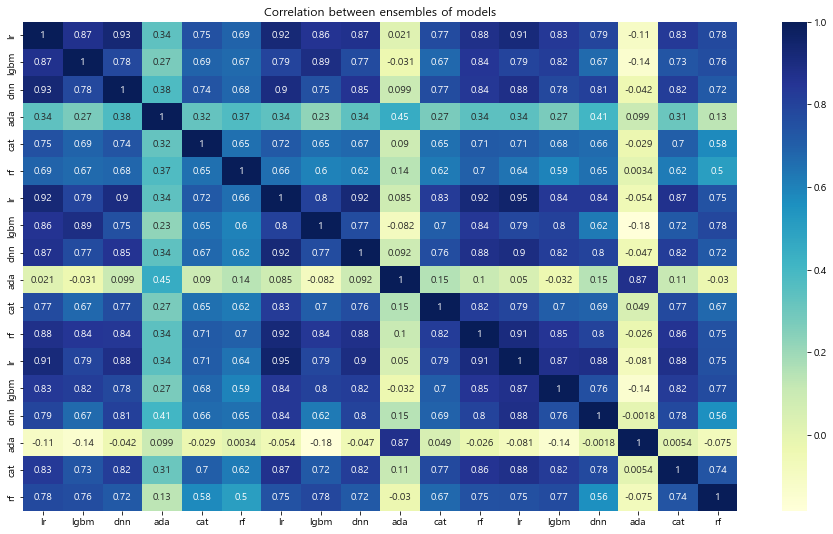

In [33]:
# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (16,9))
g = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
g.set_title("Correlation between ensembles of models")
plt.show()

In [34]:
for a in lst_e:
    print(a[1], end='\n'*3)

[{'log_loss': 0.3589366109098424, 'roc_auc': 0.7831121691644659, 'accuracy': 0.8484122562674095}, {'log_loss': 0.3919026406176198, 'roc_auc': 0.746410352250857, 'accuracy': 0.8450696378830084}, {'roc_auc': 0.7705843754517646}, {'log_loss': 0.6659024732524959, 'roc_auc': 0.7812557279445853, 'accuracy': 0.8463509749303622}, {'log_loss': 0.3931962463196055, 'roc_auc': 0.7282842476443048, 'accuracy': 0.8388300835654596}, {'log_loss': 0.49509828105768955, 'roc_auc': 0.6978717138853813, 'accuracy': 0.8466295264623955}]


[{'log_loss': 0.37031386452052284, 'roc_auc': 0.7943077124688773, 'accuracy': 0.8284122562674094}, {'log_loss': 0.39796140820811593, 'roc_auc': 0.753925942805299, 'accuracy': 0.8470752089136491}, {'roc_auc': 0.7792159685316791}, {'log_loss': 0.7619969511702186, 'roc_auc': 0.5970498113564962, 'accuracy': 0.426016713091922}, {'log_loss': 0.3814492519088455, 'roc_auc': 0.762344427587085, 'accuracy': 0.8301392757660168}, {'log_loss': 0.4003554027766078, 'roc_auc': 0.782108987974

In [35]:
# 데이터프레임에 따른 모델 컬럼명 구분을 위한 컬럼명 변경

df.columns=["lr", "lgbm", "dnn", "ada", "cat", "rf", "lr1", "lgbm1", "dnn1", "ada1", "cat1", "rf1", "lr2", "lgbm2", "dnn2", "ada2", "cat2", "rf2"]

In [36]:
# 서브미션 앙상블

def ensemble_submission(submissions,p,power=None,name=""):
    if p==0 and power==[]:
        pred=gmean(submissions,axis=1)
        
    elif p!=0 and power==[]:
        pred = (np.sum(np.array(submissions)**p, axis=1) / len(submissions.columns))**(1/p)
    
    else: 
        for i,a in enumerate(power):
            submissions.iloc[:,i]=submissions.iloc[:,i]*a
        pred=np.sum(np.array(submissions),axis=1)/sum(power)
    pd.DataFrame({"ID":test_id,"STATUS":pred}).to_csv(name+".csv",index=False)
    ok= pd.DataFrame({"ID":test_id,"STATUS":pred})
    ok["STATUS_1"]=ok["STATUS"].apply(lambda x: 1 if x>=0.5 else 0)
    
    return accuracy_score(y_test,ok.iloc[:,2]), log_loss(y_test,ok.iloc[:,1])

In [37]:
# 서브미션 콤비네이션 확인하여 loss가 가장 작은 앙상블 찾기.

max_score = 100
for p in tqdm([0, 1, 1.5]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)    
    for i in range(2, 5):
        for models in list(combinations(df.columns, i)):
            score=ensemble_submission(df[list(models)], p, power=[], name=str(p))
            if max_score > score[1]:
                max_score = score[1]
                sc=score
                best=models
                print(score, models, p)
        print(sc, best, p)
    print(sc, best, p)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

(0.8490807799442897, 0.37082898938398084) ('lr', 'lgbm') 0
(0.8486350974930362, 0.36045825733901954) ('lr', 'dnn') 0
(0.843008356545961, 0.3585896624004574) ('lr', 'lr1') 0
(0.8495821727019499, 0.3539211101498242) ('lr', 'lr2') 0
(0.8495821727019499, 0.3539211101498242) ('lr', 'lr2') 0
(0.8495821727019499, 0.3539211101498242) ('lr', 'lr2') 0
(0.8495821727019499, 0.3539211101498242) ('lr', 'lr2') 0


 33%|███████████████████████████▎                                                      | 1/3 [18:21<36:42, 1101.16s/it]

(0.8495821727019499, 0.3539211101498242) ('lr', 'lr2') 0
(0.8495821727019499, 0.3539211101498242) ('lr', 'lr2') 0
(0.84991643454039, 0.3537494781948626) ('lr', 'lr2') 1
(0.84991643454039, 0.3537494781948626) ('lr', 'lr2') 1
(0.84991643454039, 0.3537494781948626) ('lr', 'lr2') 1
(0.84991643454039, 0.3537494781948626) ('lr', 'lr2') 1


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [33:48<16:38, 998.68s/it]

(0.84991643454039, 0.3537494781948626) ('lr', 'lr2') 1
(0.84991643454039, 0.3537494781948626) ('lr', 'lr2') 1
(0.84974930362117, 0.3536696727294783) ('lr', 'lr2') 1.5
(0.84974930362117, 0.3536696727294783) ('lr', 'lr2') 1.5
(0.84974930362117, 0.3536696727294783) ('lr', 'lr2') 1.5
(0.84974930362117, 0.3536696727294783) ('lr', 'lr2') 1.5


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [50:53<00:00, 1017.86s/it]

(0.84974930362117, 0.3536696727294783) ('lr', 'lr2') 1.5
(0.84974930362117, 0.3536696727294783) ('lr', 'lr2') 1.5


In [38]:
# 수동 서브미션 앙상블 지정.

data=df.loc[:,list(best)]

In [39]:
def ensemble_submission(submissions,p,power=None,name=""):
    if p==0 and power==[]:
        pred=gmean(submissions,axis=1)
        
    elif p!=0 and power==[]:
        pred = (np.sum(np.array(submissions)**p, axis=1) / len(submissions.columns))**(1/p)
    
    else: 
        for i,a in enumerate(power):
            submissions.iloc[:,i]=submissions.iloc[:,i]*a
        pred=np.sum(np.array(submissions),axis=1)/sum(power)
    pd.DataFrame({"ID":test_id,"STATUS":pred}).to_csv(name+".csv",index=False)
    return pd.DataFrame({"ID":test_id,"STATUS":pred})

In [40]:
ok=ensemble_submission(data, 1.5, power=[], name="###")

In [41]:
ok

,ID,STATUS
0,M000136117,0.945766
1,M000261625,0.608945
2,M000350564,0.758195
3,M000419293,0.829459
4,M000494848,0.992146
...,...,...
17945,M999599111,0.719990
17946,M999673157,0.854782
17947,M999770689,0.992443
17948,M999849895,0.698876


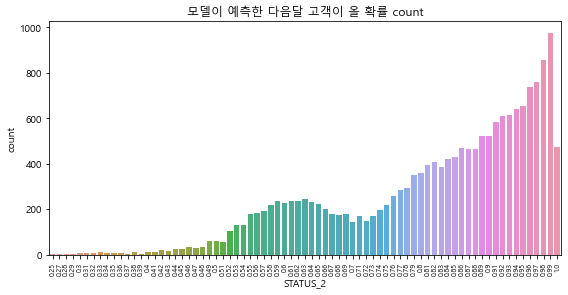

In [43]:
ok["STATUS_2"]= ok["STATUS"].apply(lambda x: np.round(x,2))

plt.figure(figsize=(8,4))
ax=sns.countplot(x="STATUS_2", data=ok)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
plt.tight_layout()
plt.title("모델이 예측한 다음달 고객이 올 확률 count")
plt.show()

In [44]:
import joblib
for i,mo in enumerate(lst_e):
    for m in mo[0]:
        if m=="dnn":
            mo[0][m].save("model/"+str(i)+"_"+m)
        else:
            joblib.dump(mo[0][m], "model/"+str(i)+"_"+m+".pkl")

INFO:tensorflow:Assets written to: model/0_dnn\assets
INFO:tensorflow:Assets written to: model/1_dnn\assets
INFO:tensorflow:Assets written to: model/2_dnn\assets
